# MLflow

In this notebook we will learn how to keep track of a data science thanks to MLFlow.
MLflow is an open-source platform designed to manage the machine learning lifecycle, including experimentation, reproducibility, and deployment. It helps data scientists and ML engineers track experiments, package code into reproducible runs, and deploy models easily.

In [ ]:
# model tracking
import mlflow
import mlflow.sklearn

# models
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Create synthetic dataset
X, y = make_regression(n_samples=200, n_features=5, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

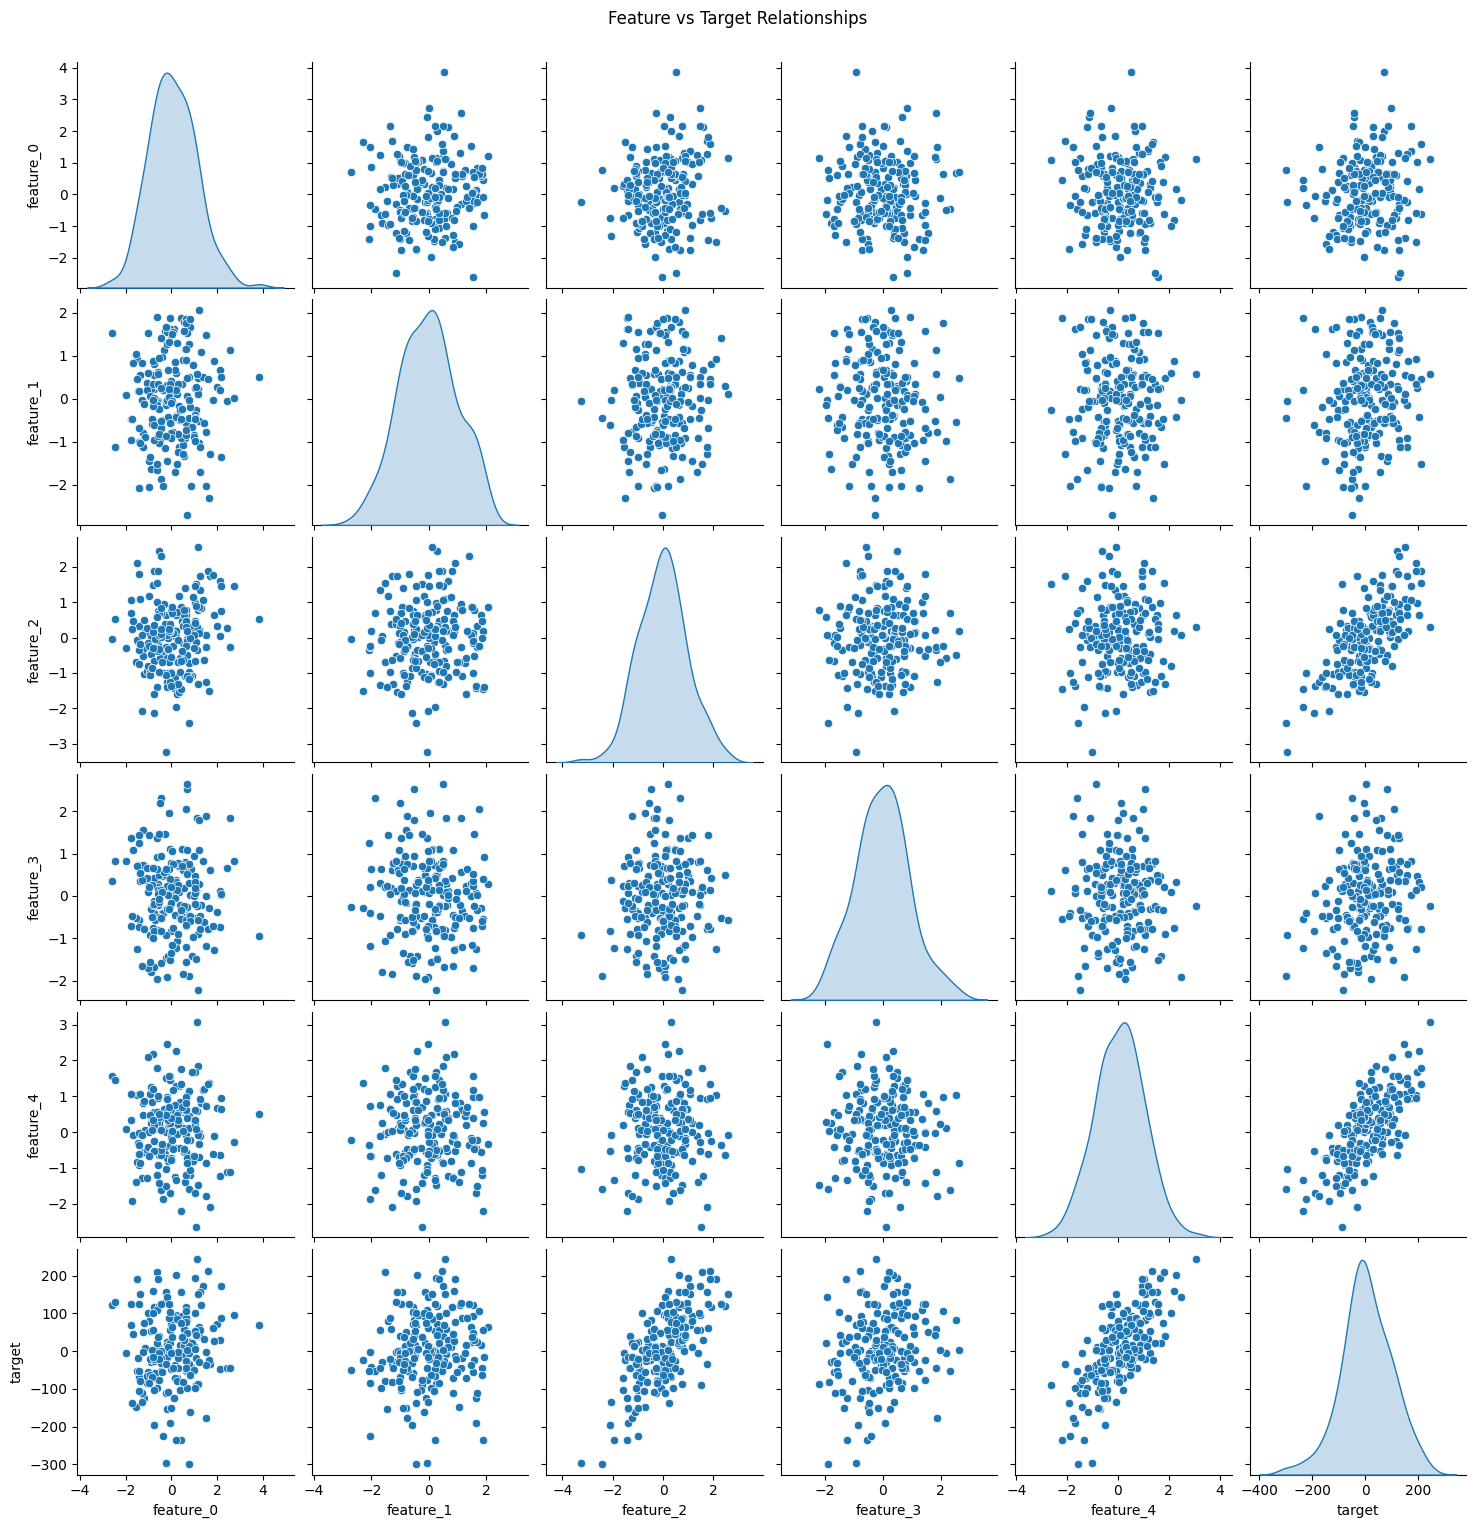

In [3]:
# Create DataFrame for visualization
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Pairplot (optional if few features)
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Feature vs Target Relationships", y=1.02)
plt.show()

A pairplot is a grid of plots that shows:
- scatter plots for each pair of features
- histograms (or KDE plots) on the diagonal to show distributions of individual features

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

The purpose of a pairplot is:
- Explore feature relationships: See if there's correlation or pattern between features and target.
- Detect multicollinearity: Strong linear relationships between input features can be spotted.
- Check for non-linear patterns: Useful for deciding model types.
- Find outliers or clusters.

From the above plot we can spot that some of the features have a linear relation with the target variable.

In [4]:
# 2. Define models and parameters
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42),
    "SVR": SVR(kernel="rbf", C=1.0)
}

In [6]:
# 3. Define MLflow settings

# Initialize MLflow
mlflow.set_experiment("Regression experiment")
#mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

2025/05/22 16:27:39 INFO mlflow.tracking.fluent: Experiment with name 'Regression experiment' does not exist. Creating a new experiment.


In [7]:
# 4. Train and log each model
for name, model in models.items():
    with mlflow.start_run(run_name=name) as run:
        run_id = run.info.run_id
        print("Run ID:", run_id)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Log metadata to MLflow
        mlflow.log_param("model_name", name)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("r2", r2)
        mlflow.sklearn.log_model(model, artifact_path="model")
        
        print(f"Logged {name}: MSE={mse:.4f}, R2={r2:.4f}")

2025/05/22 16:27:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged LinearRegression: MSE=0.0766, R2=1.0000
🏃 View run LinearRegression at: http://127.0.0.1:8080/#/experiments/304684993870807159/runs/85dbfa0ccadf43c5b6273cb8ce5db573
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/304684993870807159


2025/05/22 16:27:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Ridge: MSE=0.4291, R2=1.0000
🏃 View run Ridge at: http://127.0.0.1:8080/#/experiments/304684993870807159/runs/1db4b9042d1f43d5b73ab4aea153d701
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/304684993870807159


2025/05/22 16:27:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged RandomForest: MSE=1258.8940, R2=0.8561
🏃 View run RandomForest at: http://127.0.0.1:8080/#/experiments/304684993870807159/runs/cfdb858e737940918c356f79ed26da00
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/304684993870807159


2025/05/22 16:27:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged SVR: MSE=7886.4638, R2=0.0984
🏃 View run SVR at: http://127.0.0.1:8080/#/experiments/304684993870807159/runs/2fdafbb3bd9340709f0f32cf2a334b1a
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/304684993870807159


In [24]:
# 5. load a model, if previously saved, let's load version 1
# if the model doesn't exists it will fail
model = mlflow.sklearn.load_model(
    model_uri="models:/Regression/1"
)

print(model)
print(model.coef_)

LinearRegression()
[ 3.1488721  10.47351601 63.6802734  16.78416355 70.62414702]


Different uri formats could be used to load a model, here you can find a small summary

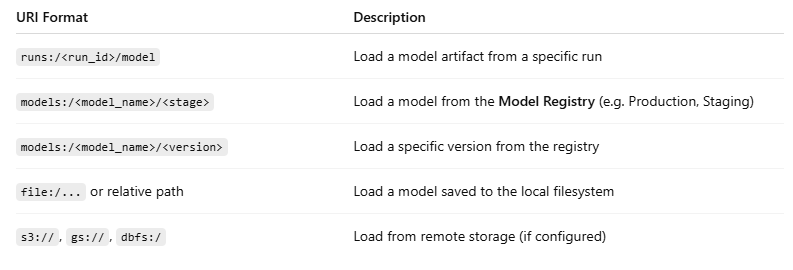

In [16]:
# 6. Register a model from python
mlflow.sklearn.log_model(
    sk_model=model,
    artifact_path="regression",
    registered_model_name="regression",
)

2025/05/22 17:43:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'regression' already exists. Creating a new version of this model...
2025/05/22 17:43:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: regression, version 2
Created version '2' of model 'regression'.
